In [185]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import cm
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import datetime

#Avoiding Type 3 fonts in matplotlib plots
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [204]:
font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=2.0)
matplotlib.rc('lines', markersize=8)

In [3]:
res='results_covid/'

## RKI Data reading

In [18]:
# reading and drop the column LKNR
df1=pd.read_csv('data/7-days incidences1.csv').drop(['LKNR'], axis=1)
df2=pd.read_csv('data/7-days incidences2.csv').drop(['LKNR'], axis=1)

In [21]:
df1.shape,df2.shape

((412, 298), (412, 417))

In [174]:
df=df1.set_index('LK').join(df2.set_index('LK'))
df.columns

Index(['18.11.2020', '19.11.2020', '20.11.2020', '21.11.2020', '22.11.2020',
       '23.11.2020', '24.11.2020', '25.11.2020', '26.11.2020', '27.11.2020',
       ...
       '22.10.2022', '23.10.2022', '24.10.2022', '25.10.2022', '26.10.2022',
       '27.10.2022', '28.10.2022', '29.10.2022', '30.10.2022', '31.10.2022'],
      dtype='object', length=713)

In [175]:
#covert to date time, specify the format
df.columns = pd.to_datetime(df.columns,infer_datetime_format=True,dayfirst=True).strftime("%Y-%m-%d")
# sort the columns by date
df = df.reindex(sorted(df.columns), axis=1)
df

,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,...,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31
LK,,,,,,,,,,,,,,,,,,,,,
LK Ahrweiler,143.8,156.1,159.1,156.1,172.2,139.1,139.9,136.8,119.9,118.4,...,649.3,649.3,649.3,445.6,507.2,451.0,407.3,378.5,378.5,378.5
LK Aichach-Friedberg,144.8,138.9,158.2,173.8,167.8,156.0,139.6,121.8,95.1,114.4,...,709.8,708.3,706.1,600.6,547.4,483.3,470.0,413.2,413.2,413.2
LK Alb-Donau-Kreis,114.7,117.2,123.8,124.8,121.8,122.8,118.2,123.3,112.6,110.1,...,565.8,565.8,565.8,461.1,417.6,384.0,369.5,346.0,345.0,345.0
LK Altenburger Land,145.4,153.3,129.8,205.8,212.5,200.2,219.3,236.0,252.8,295.3,...,543.2,511.3,435.0,437.3,346.2,428.2,453.3,355.3,322.3,291.5
LK Altenkirchen,63.7,58.2,66.8,90.1,97.8,104.8,104.8,102.5,87.7,71.4,...,755.1,755.1,755.1,704.0,626.6,552.4,529.2,502.1,502.1,502.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SK Wuppertal,189.2,193.7,176.9,203.9,198.3,198.3,194.9,197.1,190.7,174.6,...,744.8,743.1,742.6,738.9,683.6,631.5,605.0,581.3,581.0,578.7
SK Würzburg,104.7,97.7,96.1,100.1,83.6,74.3,91.5,88.3,93.0,86.8,...,588.5,588.5,588.5,610.6,580.6,546.7,474.3,476.6,476.6,476.6
SK Zweibrücken,93.6,99.4,90.7,96.5,73.1,46.8,64.3,64.3,61.4,61.4,...,976.8,976.8,976.8,877.1,706.9,736.3,692.3,642.4,642.4,642.4


In [219]:
# The average 7-days incidences over per week
Avg_7days_incidences=df.groupby(np.arange(len(df.columns)) // 7, axis=1).mean()
# rename the columns
# Avg_7days_incidences.columns=df.columns[::7]
Avg_7days_incidences

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
LK,,,,,,,,,,,,,,,,,,,,,
LK Ahrweiler,152.328571,117.728571,102.242857,97.414286,119.700000,98.257143,102.471429,108.485714,109.042857,80.300000,...,182.471429,199.442857,252.614286,289.985714,366.100000,478.457143,600.557143,719.842857,646.042857,416.833333
LK Aichach-Friedberg,154.157143,143.885714,154.900000,115.942857,133.885714,120.842857,76.585714,96.642857,77.342857,69.071429,...,289.828571,212.142857,219.957143,228.928571,302.271429,593.100000,962.100000,1051.457143,731.271429,456.716667
LK Alb-Donau-Kreis,120.471429,108.071429,116.642857,157.014286,173.600000,159.971429,99.671429,116.557143,142.157143,128.971429,...,138.485714,140.128571,126.914286,137.700000,203.200000,349.742857,511.057143,775.100000,599.385714,367.850000
LK Altenburger Land,180.900000,238.900000,336.085714,417.714286,519.371429,545.914286,425.428571,381.771429,463.300000,325.842857,...,188.242857,181.242857,160.271429,181.400000,244.714286,384.471429,521.128571,559.985714,500.428571,366.133333
LK Altenkirchen,83.742857,77.057143,81.957143,113.457143,123.100000,69.414286,48.671429,64.885714,76.542857,59.885714,...,240.057143,216.185714,204.471429,248.900000,312.085714,439.757143,574.385714,906.814286,754.085714,535.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SK Wuppertal,193.600000,189.800000,209.842857,220.900000,224.900000,175.800000,159.885714,159.500000,147.871429,126.200000,...,388.714286,312.571429,270.128571,250.857143,275.542857,361.914286,521.300000,705.614286,759.214286,610.183333
SK Würzburg,92.571429,85.085714,63.871429,89.571429,109.771429,128.528571,88.557143,76.728571,82.071429,89.114286,...,219.900000,191.000000,222.285714,242.771429,251.528571,509.700000,584.885714,761.242857,623.057143,505.233333
SK Zweibrücken,80.628571,79.371429,92.757143,82.314286,83.128571,40.542857,63.514286,55.142857,33.842857,55.142857,...,310.085714,241.800000,268.628571,372.942857,502.457143,763.514286,993.142857,1400.885714,1017.871429,677.116667


In [231]:
def line_draw(LK_name):
    fig, ax = plt.subplots(figsize=(12,8))
    x=Avg_7days_incidences.loc[LK_name,:].index
    y=Avg_7days_incidences.loc[LK_name,:].values
    plt.plot(x,y)
    plt.scatter(x,y,c=y,edgecolors=None,cmap='seismic',s=80)
    # plt.xticks(rotation=45, ha='right',fontsize=8)
    plt.xlabel('Week')
    plt.ylabel('7-days average of 7-days Incidences ')
    # plt.legend()
    # plt.xlim(left=1e-0)
    # plt.ylim((0,1))
    plt.grid()
    plt.colorbar()
    plt.tight_layout()
    plt.savefig(res+'linechart of %s.pdf'%LK_name, dpi=100, bbox_inches='tight')

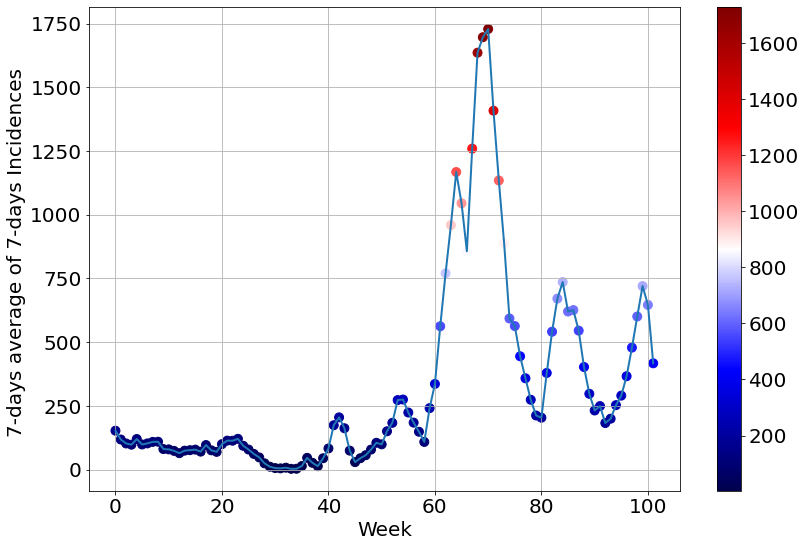

In [232]:
line_draw('LK Ahrweiler')

In [306]:
len(x)

102

In [328]:
def line_draw2(LK_name):
    fig, ax = plt.subplots(figsize=(12,8))
    x=Avg_7days_incidences.loc[LK_name,:].index
    y=Avg_7days_incidences.loc[LK_name,:].values
    
    THRESHOLD = 1.2
    # check the slope of each two adjacents is greater than SHRESHOLD
#     slopes = pd.Series(y).diff() / pd.Series(x).diff()>SHRESHOLD
    # 3 points in a role start to colouring
    c_line=pd.Series([False]*len(x))
    for i in range(len(x)-1):
        if (y[i]>THRESHOLD*y[i-1])&(y[i+1]>THRESHOLD*y[i]):
            print('i is',i,y[i-1],y[i],y[i+1])
            c_line[i-1]=True
            c_line[i]=True
            c_line[i+1]=True
        
#     plt.plot(x, y, '-bo',color='blue',mfc='blue')
#     plt.plot(x, pd.Series(y).where(c_line), '-ro',color='r', mfc='red',zorder=10)
    
    plt.plot(x, y, color='blue')
    plt.plot(x, pd.Series(y).where(c_line),color='r',zorder=10)
#     plt.scatter(x,y,c=y,edgecolors=None,cmap='bwr',s=75)
    # plt.xticks(rotation=45, ha='right',fontsize=8)
    plt.xlabel('Week')
    plt.ylabel('7-days average of 7-days Incidences ')
    # plt.legend()
    # plt.xlim(left=1e-0)
    # plt.ylim((0,1))
    plt.grid()
#     plt.colorbar()
    plt.tight_layout()
    plt.savefig(res+'linechart2 of %s.pdf'%LK_name, dpi=100, bbox_inches='tight')

i is 35 2.957142857142857 13.642857142857142 45.800000000000004
i is 39 13.057142857142859 44.128571428571426 82.62857142857142
i is 40 44.128571428571426 82.62857142857142 173.77142857142857
i is 46 28.985714285714288 44.34285714285714 56.17142857142857
i is 47 44.34285714285714 56.17142857142857 78.25714285714285
i is 48 56.17142857142857 78.25714285714285 104.91428571428571
i is 51 98.75714285714285 150.05714285714288 183.17142857142858
i is 52 150.05714285714288 183.17142857142858 272.4714285714286
i is 59 108.24285714285715 240.9 335.7714285714286
i is 60 240.9 335.7714285714286 562.3000000000001
i is 61 335.7714285714286 562.3000000000001 770.0
i is 62 562.3000000000001 770.0 959.3000000000001
i is 63 770.0 959.3000000000001 1167.6285714285714
i is 67 856.8285714285714 1259.4857142857143 1635.857142857143
i is 81 203.34285714285716 378.88571428571424 540.7857142857143
i is 82 378.88571428571424 540.7857142857143 670.7857142857143
i is 96 289.9857142857143 366.09999999999997 478.4

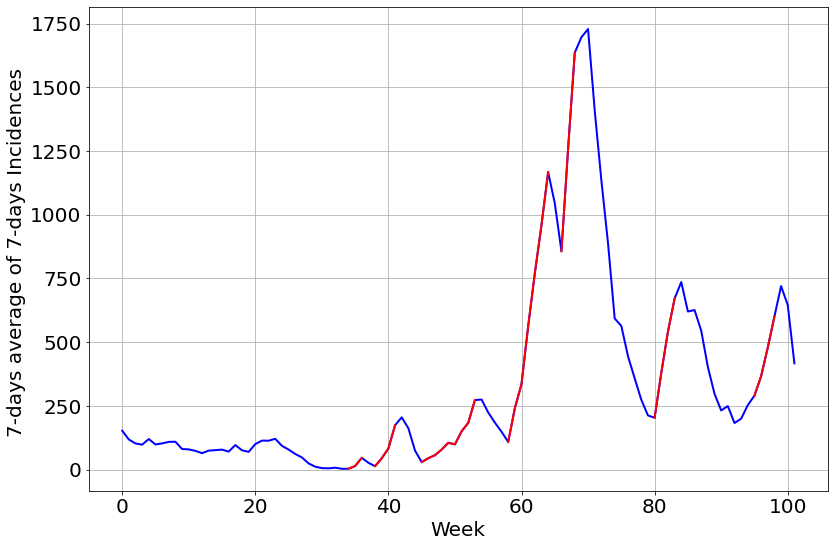

In [329]:
line_draw2('LK Ahrweiler')

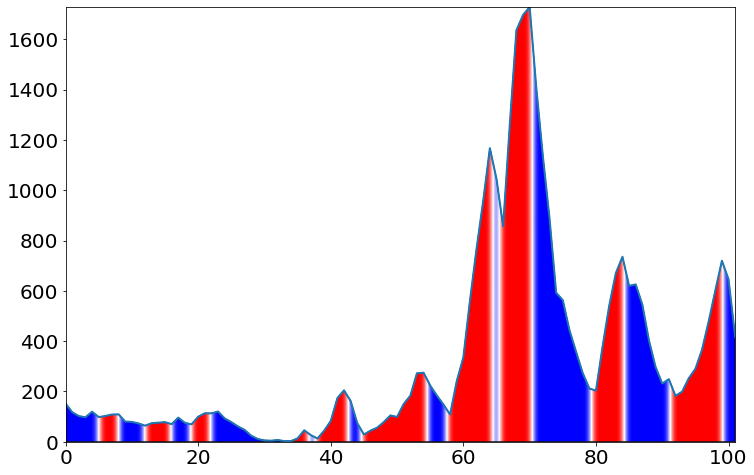

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

x=Avg_7days_incidences.loc[LK_name,:].index
y=Avg_7days_incidences.loc[LK_name,:].values
SHRESHOLD = 1.2
# check the slope of each two adjacents is greater than SHRESHOLD
slopes = pd.Series(y).diff() / pd.Series(x).diff()>SHRESHOLD
# 3 points in a role start to colouring
c_slopes=pd.Series([False]*len(slopes))
for i in range(len(slopes)-1):
    if slopes[i]&slopes[i+1]:
        c_slopes[i-1]=True
        c_slopes[i]=True
        c_slopes[i+1]=True
# grad = np.gradient(y)
elevation_origin = -0.05 # set the zero line until which the color map is filled in. 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, label='Elevation')

path = Path(np.array([np.append(x,x[::-1]), np.append(y,np.zeros_like(y))]).T)
patch = PathPatch(path, facecolor='none')
ax.add_patch(patch)
im = plt.imshow(c_slopes.values.reshape(1,y.size), cmap='bwr', interpolation='bicubic',                                        
                extent=[x[0], x[-1], elevation_origin, np.max(y)],aspect='auto',               
                clip_path=patch, clip_on=True)     
plt.show()

In [52]:
# reading json file which contains coordinate info
f=open('data/ags.json')
gis=json.load(f)
gis

{'1001': {'name': 'SK Flensburg',
  'state': 'Schleswig-Holstein',
  'lat': 54.7805,
  'lon': 9.4352,
  'population': 90164},
 '1002': {'name': 'SK Kiel',
  'state': 'Schleswig-Holstein',
  'lat': 54.3227,
  'lon': 10.1359,
  'population': 246794},
 '1003': {'name': 'SK Lübeck',
  'state': 'Schleswig-Holstein',
  'lat': 53.8696,
  'lon': 10.6876,
  'population': 216530},
 '1004': {'name': 'SK Neumünster',
  'state': 'Schleswig-Holstein',
  'lat': 54.074,
  'lon': 9.9845,
  'population': 80196},
 '1051': {'name': 'LK Dithmarschen',
  'state': 'Schleswig-Holstein',
  'lat': 54.1474,
  'lon': 9.1114,
  'population': 133193},
 '1053': {'name': 'LK Herzogtum Lauenburg',
  'state': 'Schleswig-Holstein',
  'lat': 53.6013,
  'lon': 10.5866,
  'population': 198019},
 '1054': {'name': 'LK Nordfriesland',
  'state': 'Schleswig-Holstein',
  'lat': 54.6354,
  'lon': 8.7241,
  'population': 165951},
 '1055': {'name': 'LK Ostholstein',
  'state': 'Schleswig-Holstein',
  'lat': 54.1767,
  'lon': 10.84

In [53]:
# mapping the latitude and longitude
for k in df_7days_incidences['LK']:
    idx=df_7days_incidences['LK'][df_7days_incidences['LK']==k].index[0]
    
    for new_k in gis.items():
        if new_k[1]['name']==k:
            df_7days_incidences.at[idx,'lat']=new_k[1]['lat']
            df_7days_incidences.at[idx,'lon']=new_k[1]['lon']
            df_7days_incidences.at[idx,'state']=new_k[1]['state']
            break


In [54]:
df_7days_incidences

,NR,LK,LKNR,18.11.2020,19.11.2020,20.11.2020,21.11.2020,22.11.2020,23.11.2020,24.11.2020,...,2021/9/4,2021/9/5,2021/9/6,2021/9/7,2021/9/8,2021/9/9,2021/9/10,lat,lon,state
0,2,LK Ahrweiler,7131,143.8,156.1,159.1,156.1,172.2,139.1,139.9,...,177.0,199.3,183.4,197.2,208.7,171.8,191.8,50.4365,7.0050,Rheinland-Pfalz
1,3,LK Aichach-Friedberg,9771,144.8,138.9,158.2,173.8,167.8,156.0,139.6,...,102.2,99.2,92.7,92.7,94.9,68.2,71.2,48.4111,11.0451,Bayern
2,4,LK Alb-Donau-Kreis,8425,114.7,117.2,123.8,124.8,121.8,122.8,118.2,...,107.0,89.3,104.6,103.1,91.0,84.4,78.9,48.4011,9.8363,Baden-Württemberg
3,5,LK Altenburger Land,16077,145.4,153.3,129.8,205.8,212.5,200.2,219.3,...,28.3,27.2,27.1,27.1,44.0,40.6,36.1,50.9579,12.3802,Thüringen
4,6,LK Altenkirchen,7132,63.7,58.2,66.8,90.1,97.8,104.8,104.8,...,113.9,104.6,103.1,117.1,114.0,98.5,98.5,50.7127,7.6828,Rheinland-Pfalz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,407,SK Wuppertal,5124,189.2,193.7,176.9,203.9,198.3,198.3,194.9,...,240.0,227.6,220.8,215.5,214.9,208.4,210.4,51.2613,7.1630,Nordrhein-Westfalen
408,408,SK Würzburg,9663,104.7,97.7,96.1,100.1,83.6,74.3,91.5,...,99.2,89.0,98.2,96.6,98.2,99.8,96.6,49.7878,9.9361,Bayern
409,411,SK Zweibrücken,7320,93.6,99.4,90.7,96.5,73.1,46.8,64.3,...,94.1,97.1,96.9,99.8,102.7,88.1,64.6,49.2500,7.3667,Rheinland-Pfalz
410,1,StadtRegion Aachen,5334,211.8,179.3,174.3,161.4,121.2,116.0,149.4,...,76.0,81.6,82.3,82.1,66.6,73.6,69.7,50.7667,6.1000,Nordrhein-Westfalen


In [55]:
df_7days_incidences.to_csv('data/7-days incidences-coordinate.csv')